# Linear Discriminant Analysis (LDA)

**Objective**:
 demonstrate how LDA works for classification.

**Assumptions**
- all features are normal distributed.
- all features are uncorrelated
- all classes displays the same covariance matrix

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

### Cenario 1 - LDA with 1 normal distributed feature

Generating a dataset with only one feature that is normally distributed and a binary target.

             x         fx  y
444  13.882260  -0.934258  1
765  17.130760  18.267059  1
246  16.149368  -9.412485  1
686   6.993857  -6.588989  0
73   10.955279  10.442905  1


<AxesSubplot:xlabel='fx', ylabel='Count'>

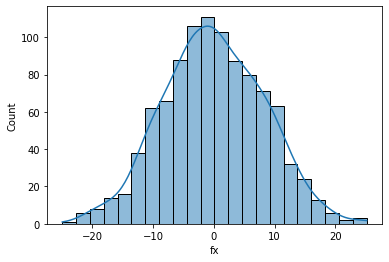

In [58]:

#features X
mean, std = 10, 5
x = np.random.normal(mean, std, 1000)

#target y
y = [1 if i >= mean else 0 for i in x]

#data with X an y
data = pd.DataFrame({'x':x, 'fx': fx,'y':y})
print(data.sample(5))

sns.histplot(data=data, x='fx', kde=True)

In a nutshell, we will separate the dataset by each class, estimate their distribution and, lastly, create a score which will determine an element's classification. About that score, every element will be given a log-normal probability to belong to each class and the final prediction will be based of which number is higher. Theses log-normal probability will be calculated by a function called **Decision Functions**.

In [59]:
#step 1: separate the sample by class
sample_class1 = data.loc[data['y'] == 1, 'x']
sample_class0 = data.loc[data['y'] == 0, 'x']

In [60]:
#step 2: calculate the means and a single weighted variance for estimating the distributions
mean_class1 = sample_class1.mean()
mean_class0 = sample_class0.mean()
variance = 1/(len(data) - len(set(y))) * (sum((sample_class1 - mean_class1) ** 2) + sum((sample_class0 - mean_class0) ** 2))

mean_class1, mean_class0, variance

(14.016966393682313, 6.180514767932154, 8.973726473642667)

In [61]:
#step 3: calculate the log-probability of a random element belong to each class
ln_prob_class1 = np.log(len(sample_class1)/(len(sample_class1) + len(sample_class0)))
ln_prob_class0 = np.log(1 - prob_class1)

ln_prob_class1, ln_prob_class0

(-0.6971552019574841, -0.7277386253295643)

In [66]:
#step 4: LDA classifier
data['decision_fx_class1'] = data['x'] * mean_class1/(variance**2) - (mean_class1**2)/(2*(variance**2)) + ln_prob_class1
data['decision_fx_class0'] = data['x'] * mean_class0/(variance**2) - (mean_class0**2)/(2*(variance**2)) + ln_prob_class0
data['prediction_lda'] = np.where(data['decision_fx_class1'] > data['decision_fx_class0'], 1, 0)

In [67]:
#comparing results
print(confusion_matrix(data['y'], data['prediction_lda']))
print(accuracy_score(data['y'], data['prediction_lda']))
print(precision_score(data['y'], data['prediction_lda']))
print(recall_score(data['y'], data['prediction_lda']))

[[480  22]
 [  0 498]]
0.978
0.9576923076923077
1.0


[Text(0.5, 0, 'feature x'), Text(0, 0.5, 'Log-Normal Probability')]

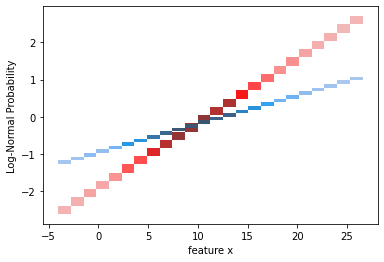

In [68]:
#graphing the probabilty
fig, ax = plt.subplots()
a = sns.histplot(data=data, x='x', y='decision_fx_class1', kde=True, color='red')
b = sns.histplot(data=data, x='x', y='decision_fx_class0', kde=True)
ax.set(xlabel='feature x', ylabel='Log-Normal Probability')

The **Linear** of **Linear** Discriminant Analysis is easy to understand with the plot above: the algorith transform the distribution into a line, allowing a more simple approach for the prediction. The red and blue line represents the log-normal probabilities of belonging to each class. For example, when x=0, the blue line is higher that the red line, so these elements will be predicted as class 0. 

### Cenario 2 - LDA with 3 normal distributed and differents covariance matrices

            xA         xB        xC        fx  y
264  15.428854  -8.625119 -3.844330  2.959405  1
737  11.237885 -18.224967 -1.369388 -8.356470  0
441  10.777648  -4.823380 -0.853304  5.100965  1
967   4.811168 -14.278270  0.769896 -8.697207  0
857   8.802049  -7.324847 -4.887514 -3.410312  0


<AxesSubplot:xlabel='value', ylabel='Count'>

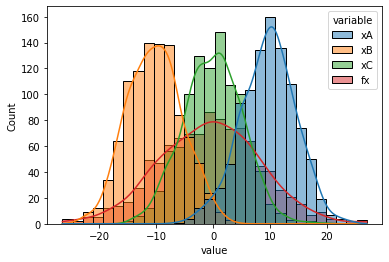

In [71]:
#features X
meanA, stdA = 10, 5
xA = np.random.normal(meanA, stdA, 1000)

meanB, stdB = -10, 5
xB = np.random.normal(meanB, stdB, 1000)

meanC, stdC = 0, 5
xC = np.random.normal(meanC, stdC, 1000)

#target y
fx = xA + xB + xC
y = [1 if i >= (meanA + meanB + meanC) else 0 for i in fx]

#data with X an y
data = pd.DataFrame({'xA':xA, 'xB':xB, 'xC':xC, 'fx': fx, 'y':y})
print(data.sample(5))

sns.histplot(data=pd.melt(data, id_vars=['y'], value_vars=['xA', 'xB', 'xC', 'fx']), x='value', hue='variable', kde=True)

In [72]:
#step 1: separate the sample by class
sample_class1 = data.loc[data['y'] == 1][['xA', 'xB', 'xC']]
sample_class0 = data.loc[data['y'] == 0][['xA', 'xB', 'xC']]

With more variables, a single weighted variance is not enough: we will need to account for the effect one variable have on another. Thus, it is necessary to calculate the **covariance matrix** for each subsample. 

In foresight, since we are dealing with matrix calculations, it will be required to **transpose** some elements. 

In [73]:
#step 2: calculate the means and the covariance matrix
mean_class1 = np.array(sample_class1.mean()).reshape(3,1)
mean_class1_t = mean_class1.reshape(1,3)

mean_class0 = np.array(sample_class0.mean()).reshape(3,1)
mean_class0_t = mean_class0.reshape(1,3)

cov_class1 = sample_class1.cov()
cov_class0 = sample_class0.cov()

mean_class1, mean_class0, cov_class1, cov_class0

(array([[12.10511144],
        [-7.93566739],
        [ 2.50939841]]),
 array([[  7.42016276],
        [-12.32045879],
        [ -2.36577709]]),
            xA         xB         xC
 xA  16.710432  -4.172287  -4.026113
 xB  -4.172287  18.632237  -6.593530
 xC  -4.026113  -6.593530  20.889888,
            xA         xB         xC
 xA  19.143550  -3.588945  -5.487668
 xB  -3.588945  17.867298  -5.018670
 xC  -5.487668  -5.018670  20.249406)

One of the assumptions required for LDA is equal covariance matrix between the subsamples, which is not true in our case. In foresight, although the impact on the metrics will be irrelevant, the violation of the assumption will disrupts the linear behavior expected.  

In [75]:
#step 3: calculate the log-probability of a random element belong to each class
ln_prob_class1 = np.log(len(sample_class1)/len(data))
ln_prob_class0 = np.log(len(sample_class0)/len(data))

ln_prob_class1, ln_prob_class0

(-0.7381445464906811, -0.6500876910994983)

LDA decision function equation:

<img src="img/decision_fx_equation.PNG" />

*source: https://arxiv.org/pdf/1906.02590.pdf*

In [77]:
#step 4: create decision functions
X = data[['xA', 'xB', 'xC']]
decision_fx_class1 = []
decision_fx_class0 = []

for i in range(len(X)):
      #assigning x row for row 
      x = np.array(X.loc[i]).reshape(3, 1)
      x_t = x.reshape(1, 3)

      #decision function class 1
      fx1 = -0.5 * np.matmul(np.matmul(x_t, np.linalg.inv(cov_class1)), x) \
            -0.5 * np.matmul(np.matmul(mean_class1_t, np.linalg.inv(cov_class1)), mean_class1) \
            + np.matmul(np.matmul(mean_class1_t, np.linalg.inv(cov_class1)), x) + ln_prob_class1  

      #decision function class 0
      fx0 = -0.5 * np.matmul(np.matmul(x_t, np.linalg.inv(cov_class0)), x) \
      -0.5 * np.matmul(np.matmul(mean_class0_t, np.linalg.inv(cov_class0)), mean_class0) \
      + np.matmul(np.matmul(mean_class0_t, np.linalg.inv(cov_class0)), x) + ln_prob_class0  

      #storing the results as scalar values in lists
      decision_fx_class1.append(np.asscalar(fx1))
      decision_fx_class0.append(np.asscalar(fx0))

data['fx1_manual'] = decision_fx_class1
data['fx0_manual'] = decision_fx_class0
data['fx1_minus_fx0_manual'] = data['fx1_manual'] - data['fx0_manual']
data['prediction_manual'] = np.where(data['fx1_minus_fx0_manual'] >= 0, 1, 0)

data.sample(3)

C:\Users\Kenji\AppData\Local\Temp\ipykernel_5780\1399235766.py:22: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  decision_fx_class1.append(np.asscalar(fx1))
C:\Users\Kenji\AppData\Local\Temp\ipykernel_5780\1399235766.py:23: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  decision_fx_class0.append(np.asscalar(fx0))


,xA,xB,xC,fx,y,fx1_manual,fx0_manual,fx1_minus_fx0_manual,prediction_manual
689,16.258722,-8.328965,6.472383,14.402140,1,-2.091902,-9.009646,6.917744,1
823,8.953587,-10.113472,-9.851745,-11.011630,0,-7.517919,-2.042258,-5.475660,0
354,5.866069,-21.153667,-10.509130,-25.796728,0,-21.241761,-7.339651,-13.902110,0


In [78]:
#comparing the results
print(confusion_matrix(data['y'], data['prediction_manual']))
print(accuracy_score(data['y'], data['prediction_manual']))
print(precision_score(data['y'], data['prediction_manual']))
print(recall_score(data['y'], data['prediction_manual']))

[[519   3]
 [  6 472]]
0.991
0.9936842105263158
0.9874476987447699


[Text(0.5, 0, 'fx = xA + xB + xC'), Text(0, 0.5, 'Log-Normal Probability')]

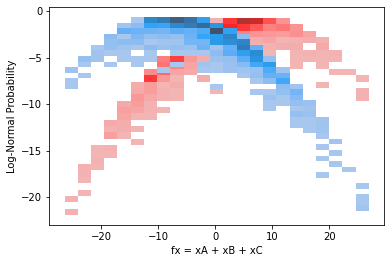

In [82]:
#graphing the log-probabilty
fig, ax = plt.subplots()
sns.histplot(data=data, x='fx', y='fx1_manual', kde=True, color='red')
sns.histplot(data=data, x='fx', y='fx0_manual', kde=True)
ax.set(xlabel='fx = xA + xB + xC', ylabel='Log-Normal Probability')

These exponential curves were not expected, and were resulted by the difference between the covariance matrices. The explanation is purely mathematical and it is wise to be supported by the equations bellow.

At fist, let's forget the example above and just consider a imaginary case of equal covariance matrix. In this case the first element (marked in yellow) of the equation would be the same for both Decision Functions, so during comparisons between both equations, they would annulate each other. 

Now, returning to the problem at hand, since the covariance matrices are different, the annulation does not happen. This is a big deal because the element that should be annulated is what confers the exponential effect on the curve. In other words, the elimination of the element in yellow allows the distribution to be represented as a line.

<img src="img/covariance.PNG" />

*source: https://arxiv.org/pdf/1906.02590.pdf*

### Example 3 - Scikit-Learn

We'll apply the same data for Scikit-Learn's LDA function.

In [83]:
#check with scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = data[['xA', 'xB', 'xC']]
y = data['y']

lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=True).fit(X, y)
lda.predict(X).tolist()

data['fx1_sklearn'] = lda.predict_log_proba(X)[:,1]
data['fx0_sklearn'] = lda.predict_log_proba(X)[:,0]
data['fx1_minus_fx0_sklearn'] = lda.decision_function(X)
data['prediction_sklearn'] = lda.predict(X).tolist()

data.sample(3)

,xA,xB,xC,fx,y,fx1_manual,fx0_manual,fx1_minus_fx0_manual,prediction_manual,fx1_sklearn,fx0_sklearn,fx1_minus_fx0_sklearn,prediction_sklearn
810,4.900848,-11.388210,-2.191277,-8.678639,0,-5.352218,-0.826511,-4.525707,0,-4.291457,-0.013779,-4.277678,0
46,11.061528,-6.709781,-3.464189,0.887559,1,-1.810996,-2.288931,0.477935,1,-0.461998,-0.994316,0.532318,1
221,6.877027,-8.587743,-0.533459,-2.244175,0,-2.461369,-1.304729,-1.156640,0,-1.355438,-0.298183,-1.057255,0


The difference between the decision functions of both Scikit-learn and manual LDA is small, although the decision functions are wildly divergent. It can be explained by the specification in the mathematical equation:

**1. Scikit-learn:**

<img src="img/lda_equation_sklearn.PNG" />
<img src="img/lda_equation_sklearn_cst.PNG" />


**2. Manual:**

<img src="img/decision_fx_equation1.PNG" />

<img src="img/decision_fx_equation2.PNG" />


In [13]:
#comparing the results
print(confusion_matrix(data['y'], data['prediction_sklearn']))
print(accuracy_score(data['y'], data['prediction_sklearn']))
print(precision_score(data['y'], data['prediction_sklearn']))
print(recall_score(data['y'], data['prediction_sklearn']))

[[484   9]
 [  5 502]]
0.986
0.9823874755381604
0.9901380670611439


<AxesSubplot:xlabel='fx', ylabel='fx1_sklearn'>

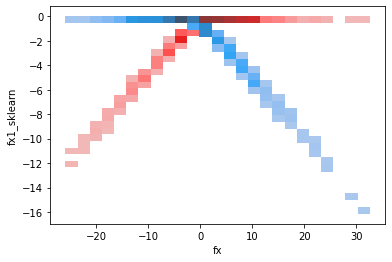

In [14]:
#graphing the probabilty (probably wrong)
sns.histplot(data=data, x='fx', y='fx1_sklearn', kde=True, color='red')
sns.histplot(data=data, x='fx', y='fx0_sklearn', kde=True)

The Scikit-Learn LDA produces the desirable linear curves. Let's observe the covariance matrix used during the calculations.

In [15]:
#comparing the covariance matrices
#1. manual LDA
print(cov_class1)
print(cov_class0)

#2. sklearn LDA
print('\n',lda.covariance_)

           xA         xB         xC
xA  19.357841  -4.853061  -4.563991
xB  -4.853061  18.859192  -5.312231
xC  -4.563991  -5.312231  21.249282
           xA         xB         xC
xA  20.601431  -5.728951  -4.063289
xB  -5.728951  20.341197  -5.761823
xC  -4.063289  -5.761823  19.072519

 [[19.9309718  -5.27429273 -4.30851794]
 [-5.27429273 19.55062014 -5.52280574]
 [-4.30851794 -5.52280574 20.13581607]]


Comparing the matrices, it is clear that the Scikit-learn's LDA estimate a unique covariance matrix using the mean of every element in the original covariance matrices. 

*obs.: the argument `store_covariance=True` is required for retrieving the covariance*

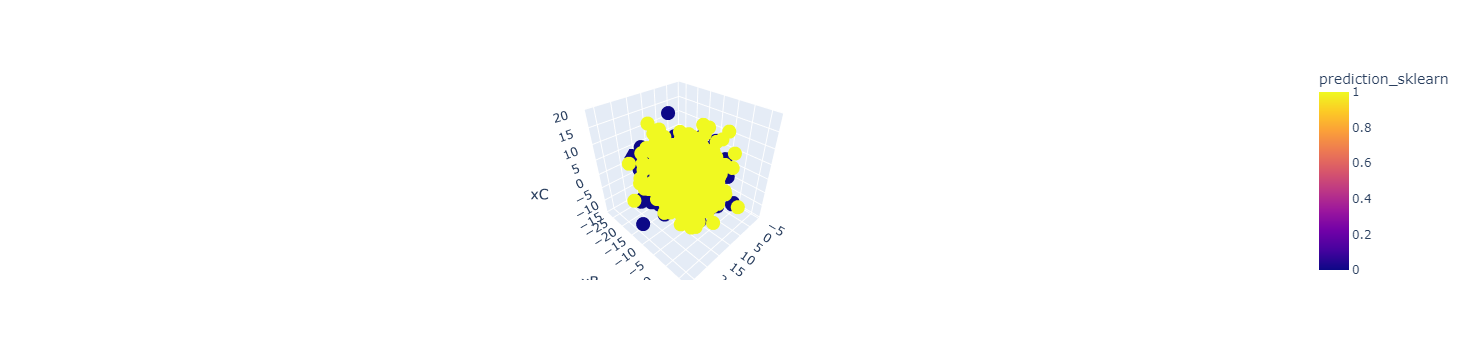

In [16]:
#Extra: 3d visualization with Plotly
import plotly.express as px

fig = px.scatter_3d(data,
                    x='xA' , y='xB', z='xC', color='prediction_sklearn')
fig.show()

### Cenario 3 - LDA with 2 normal distributed and high correlated features

            xA         xB         fx  y
376   5.291801  19.404225  24.696025  1
876  12.255465   0.865688  13.121153  1
409   3.537300 -10.387597  -6.850296  0
393  11.286328  11.810095  23.096423  1
148  15.779668   6.916761  22.696428  1


<AxesSubplot:xlabel='value', ylabel='Count'>

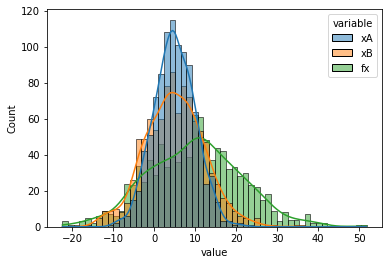

In [31]:
#feature A
meanA, stdA = 5, 5
xA = np.random.normal(meanA, stdA, 1000)


#feature B
meanB, stdB = 0, 5
xB = xA + np.random.normal(meanB, stdB, 1000)

#class
fx = xA + xB

y = [1 if i >= (meanA + meanB) else 0 for i in fx]

#data with X an y
data = pd.DataFrame({'xA':xA, 'xB':xB, 'fx': fx, 'y':y})
print(data.sample(5))

sns.histplot(data=pd.melt(data, id_vars=['y'], value_vars=['xA', 'xB', 'fx']), x='value', hue='variable', kde=True)

In [36]:
#how correlated are xA and xB?
X = data[['xA', 'xB']]
y = data['y']

X.corr()

,xA,xB
xA,1.000000,0.716216
xB,0.716216,1.000000


In [38]:
#LDA
lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=True).fit(X, y)
lda.predict(X).tolist()

data['fx1_sklearn'] = lda.predict_log_proba(X)[:,1]
data['fx0_sklearn'] = lda.predict_log_proba(X)[:,0]
data['prediction_sklearn'] = lda.predict(X).tolist()

data.sample(3)

,xA,xB,fx,y,prediction_sklearn,fx1_sklearn,fx0_sklearn
945,8.031630,8.115624,16.147254,1,1,-0.015479,-4.176013
252,7.258261,11.070567,18.328828,1,1,-0.008225,-4.804640
613,11.255404,16.541445,27.796849,1,1,-0.000245,-8.313422


[[336   1]
 [  7 656]]
0.992
0.9984779299847792
0.9894419306184012


<AxesSubplot:xlabel='fx', ylabel='fx1_sklearn'>

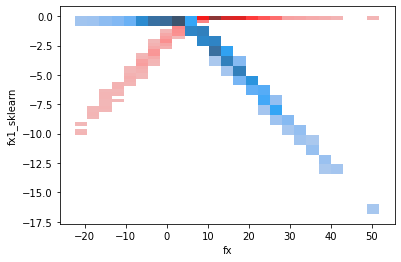

In [35]:
#comparing the results
print(confusion_matrix(data['y'], data['prediction_sklearn']))
print(accuracy_score(data['y'], data['prediction_sklearn']))
print(precision_score(data['y'], data['prediction_sklearn']))
print(recall_score(data['y'], data['prediction_sklearn']))

#graphing the probabilty (probably wrong)
sns.histplot(data=data, x='fx', y='fx1_sklearn', kde=True, color='red')
sns.histplot(data=data, x='fx', y='fx0_sklearn', kde=True)

**Conclusion:**
even with highly correlated independent variables, the algorithm produces excelent metrics. For future studies, it can be explored if the existence of high correlation is more damaging in a specific cenario or even if the low correlation features is more of a recomendation than a requirement in itself. 